In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test)= cifar10.load_data()
print('x_train shape : ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


170508288/170498071 [==============================] - 4s 0us/step
x_train shape :  (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

#model 0

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3),activation ='relu', padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 525,898
Trainable params: 525,898
Non-trainable params: 0
__________________________________________________

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
          batch_size=64,
          epochs=5,
          validation_split=0.2
          )

Epoch 1/5
625/625 [==============================] - 38s 60ms/step - loss: 1.5240 - accuracy: 0.4513 - val_loss: 1.2772 - val_accuracy: 0.5523
Epoch 2/5
625/625 [==============================] - 29s 46ms/step - loss: 1.1974 - accuracy: 0.5787 - val_loss: 1.1668 - val_accuracy: 0.5993
Epoch 3/5
625/625 [==============================] - 30s 47ms/step - loss: 1.0754 - accuracy: 0.6228 - val_loss: 1.0967 - val_accuracy: 0.6228
Epoch 4/5
625/625 [==============================] - 28s 45ms/step - loss: 0.9916 - accuracy: 0.6544 - val_loss: 1.0774 - val_accuracy: 0.6280
Epoch 5/5
625/625 [==============================] - 29s 46ms/step - loss: 0.9261 - accuracy: 0.6772 - val_loss: 1.0513 - val_accuracy: 0.6356


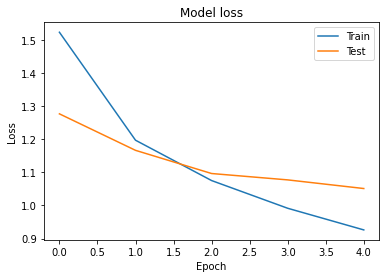

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

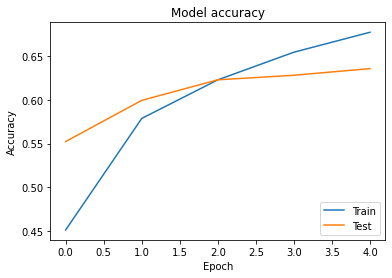

In [10]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

#model 1

In [11]:
model1 = Sequential()
model1.add(Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                802880    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                      

In [12]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist1 = model1.fit(x_train, y_train,
          batch_size=64,
          epochs=5,
          validation_split=0.2
          )

Epoch 1/5
625/625 [==============================] - 54s 86ms/step - loss: 1.5813 - accuracy: 0.4299 - val_loss: 1.3068 - val_accuracy: 0.5360
Epoch 2/5
625/625 [==============================] - 54s 87ms/step - loss: 1.1840 - accuracy: 0.5802 - val_loss: 1.1023 - val_accuracy: 0.6203
Epoch 3/5
625/625 [==============================] - 53s 86ms/step - loss: 1.0287 - accuracy: 0.6409 - val_loss: 1.0350 - val_accuracy: 0.6430
Epoch 4/5
625/625 [==============================] - 54s 86ms/step - loss: 0.9319 - accuracy: 0.6751 - val_loss: 0.9945 - val_accuracy: 0.6578
Epoch 5/5
625/625 [==============================] - 54s 86ms/step - loss: 0.8561 - accuracy: 0.7005 - val_loss: 0.9784 - val_accuracy: 0.6650


In [13]:
est_loss, test_acc = model1.evaluate(x_test, y_test, verbose=2)

313/313 - 5s - loss: 0.9725 - accuracy: 0.6618 - 5s/epoch - 16ms/step


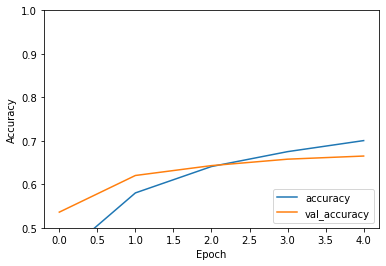

313/313 - 2s - loss: 1.0580 - accuracy: 0.6319 - 2s/epoch - 7ms/step
0.6319000124931335


In [14]:
plt.plot(hist1.history['accuracy'], label='accuracy')
plt.plot(hist1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

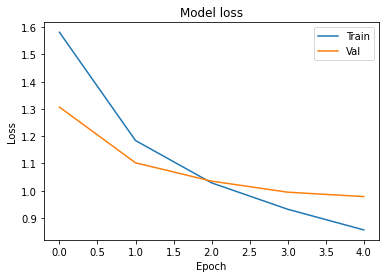

In [15]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#model 2

In [16]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1600)             

In [17]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist2 = model2.fit(x_train, y_train,
          batch_size=64,
          epochs=5,
          validation_split=0.2
          )

Epoch 1/5
625/625 [==============================] - 58s 93ms/step - loss: 1.6079 - accuracy: 0.4133 - val_loss: 1.3333 - val_accuracy: 0.5278
Epoch 2/5
625/625 [==============================] - 60s 95ms/step - loss: 1.2100 - accuracy: 0.5719 - val_loss: 1.1389 - val_accuracy: 0.5994
Epoch 3/5
625/625 [==============================] - 60s 95ms/step - loss: 1.0490 - accuracy: 0.6295 - val_loss: 0.9824 - val_accuracy: 0.6593
Epoch 4/5
625/625 [==============================] - 59s 94ms/step - loss: 0.9407 - accuracy: 0.6730 - val_loss: 0.9250 - val_accuracy: 0.6787
Epoch 5/5
625/625 [==============================] - 59s 95ms/step - loss: 0.8664 - accuracy: 0.6962 - val_loss: 0.8961 - val_accuracy: 0.6914


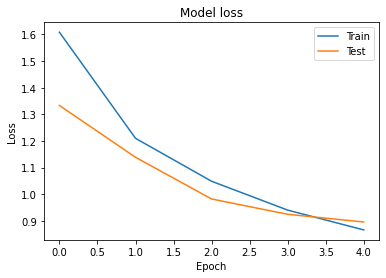

In [18]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [19]:
print(hist2.history)

{'loss': [1.6078591346740723, 1.2100449800491333, 1.0489612817764282, 0.9406799674034119, 0.8664497137069702], 'accuracy': [0.4133000075817108, 0.5718749761581421, 0.6294749975204468, 0.6730499863624573, 0.6961749792098999], 'val_loss': [1.3332533836364746, 1.1388651132583618, 0.982422947883606, 0.9250468015670776, 0.8960828185081482], 'val_accuracy': [0.5278000235557556, 0.599399983882904, 0.6593000292778015, 0.6786999702453613, 0.6913999915122986]}


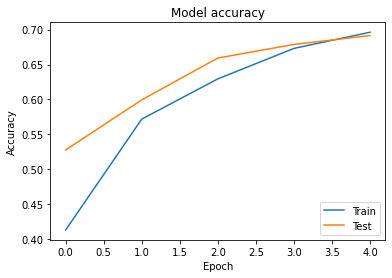

In [20]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()